In [1]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data_with_lpips_alex_similarity.csv")

In [4]:
(data["score"] == 0).sum() / data.shape[0]

0.18668366484663712

In [8]:
data[(data["similarity_1back"] < 0.71) & (data["similarity_1back"] > 0.7)].head(10)

,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,current_labeling_state,response_submitted_at,problem_appeared_at,origin,...,2back_accuracy,3back_accuracy,1forward_accuracy,origin_file,shifted_origin_1back,shifted_origin_file_1back,shifted_origin_1forward,shifted_origin_file_1forward,similarity_1back,similarity_1forward
31459,31459,31494,673548,675467,1196,0,gold_standard,2021-01-04 15:29:47.043000+00:00,2021-01-04 15:29:46.135000+00:00,ISIC_0032974.jpeg,...,0,0,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0025561.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0034256.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7033,0.5734
33315,33315,33350,730023,731966,1196,100,gold_standard,2021-01-21 18:49:11.352999+00:00,2021-01-21 18:49:10.668999+00:00,ISIC_0032755.jpeg,...,0,0,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0025116.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029265.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7039,0.4957
33861,33861,33896,732474,734417,1196,100,gold_standard,2021-01-21 20:23:19.687000+00:00,2021-01-21 20:23:18.948000+00:00,ISIC_0026207.jpeg,...,1,0,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0026057.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0031687.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7070,0.4298
47336,47336,47459,71552,71859,11568,100,gold_standard,2020-05-17 21:41:01.217000+00:00,2020-05-17 21:41:00.515000+00:00,ISIC_0028855.jpeg,...,0,0,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0032214.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0032449.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7031,0.2545
53074,53074,53201,219572,220618,11599,100,gold_standard,2020-07-28 21:58:58.109999+00:00,2020-07-28 21:58:56.645999+00:00,ISIC_0025054.jpeg,...,0,1,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0030404.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0028481.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7068,0.5695
56336,56336,56467,139703,140383,11697,100,gold_standard,2020-06-24 10:57:56.385000+00:00,2020-06-24 10:57:55.691000+00:00,ISIC_0030120.jpeg,...,1,1,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0028983.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0033240.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7051,0.6071
56722,56722,56853,223416,224471,11697,100,gold_standard,2020-07-29 00:43:33.091000+00:00,2020-07-29 00:43:31.553999+00:00,ISIC_0032214.jpeg,...,0,0,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0030068.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029685.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7042,0.6947
85913,85913,86100,614371,616251,19769,100,gold_standard,2020-12-27 05:21:36.365999+00:00,2020-12-27 05:21:33.798000+00:00,ISIC_0028222.jpeg,...,0,0,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0024449.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029572.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7081,0.7023
85914,85914,86101,614372,616252,19769,0,gold_standard,2020-12-27 05:21:40.016000+00:00,2020-12-27 05:21:38.148000+00:00,ISIC_0029572.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0028222.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0034218.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7023,0.3401
87142,87142,87329,617919,619801,19769,0,gold_standard,2020-12-27 07:14:38.957000+00:00,2020-12-27 07:14:38.168999+00:00,ISIC_0028588.jpeg,...,0,0,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0028844.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0024827.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.7057,0.5280


In [5]:
similarity_1forward_max = data['similarity_1back'].max()
similarity_1forward_min = data['similarity_1forward'].min()
print(similarity_1forward_max,similarity_1forward_min)

data['similarity_bins_1back'] = pd.cut(x=data['similarity_1back'], bins=np.arange(0, 0.80, 0.01))
data['similarity_bins_1forward'] = pd.cut(x=data['similarity_1forward'], bins=np.arange(0, 0.80, 0.01))
data_per_bin_b = data.groupby(['similarity_bins_1back']).mean()
data_per_bin_f = data.groupby(['similarity_bins_1forward']).mean()
similarity_sorted = data.sort_values(by='similarity_1forward', ascending=False)
data_per_bin_b

0.7981 0.0


,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,RT,1back_accuracy,2back_accuracy,3back_accuracy,1forward_accuracy,similarity_1back,similarity_1forward
similarity_bins_1back,,,,,,,,,,,,,
"(0.0, 0.01]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.01, 0.02]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.02, 0.03]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.03, 0.04]",269769.000000,270760.000000,488215.000000,489944.000000,40781.000000,0.000000,3.922001,0.000000,1.000000,0.000000,1.000000,0.031200,0.273200
"(0.04, 0.05]",404217.500000,405974.500000,295781.000000,297057.500000,46359.500000,100.000000,2.473499,1.000000,0.500000,0.000000,0.500000,0.046100,0.455650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(0.74, 0.75]",381759.775000,383530.275000,366427.575000,367743.025000,41077.775000,75.000000,2.153800,0.625000,0.525000,0.575000,0.500000,0.745443,0.552843
"(0.75, 0.76]",380285.047619,382163.285714,437087.095238,438507.761905,40299.428571,66.666667,1.941857,0.761905,0.380952,0.571429,0.666667,0.754400,0.510776
"(0.76, 0.77]",360355.923077,362072.769231,377952.692308,379257.307692,37349.769231,69.230769,1.467692,0.538462,0.461538,0.615385,0.307692,0.764615,0.548477


In [ ]:
data_per_bin_b1 = data.groupby(['similarity_bins_1back']).count()
data_per_bin_f1 = data.groupby(['similarity_bins_1forward']).count()
data_per_bin_b1[0:10]

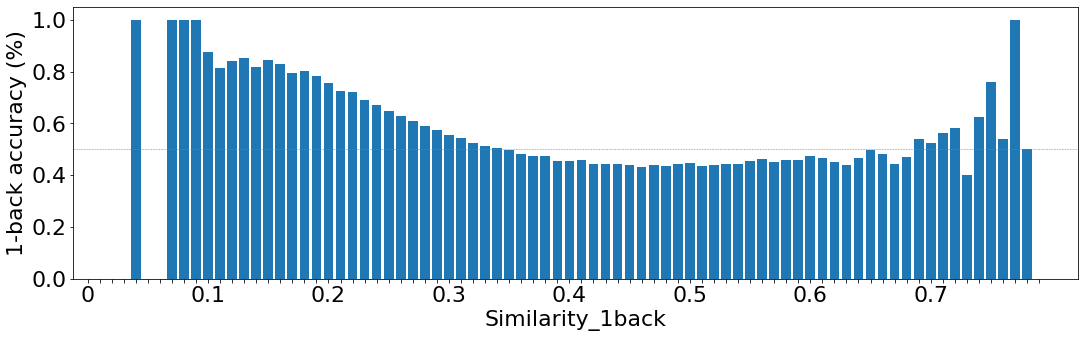

In [7]:
# PLOT 1: Similarity Barplot over all trials
y = data_per_bin_b['1back_accuracy']
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels1 = ['']*(len(x)+1)

temp = 0
numb = 0
while temp < len(x_labels1):
    x_labels1[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels1)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('Similarity_1back')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: above 0.5 SD is apparent

### 1-Back analysis before Merging two sides

/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/1873343986.py:17: RuntimeWarning: invalid value encountered in long_scalars
  hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/1873343986.py:18: RuntimeWarning: invalid value encountered in long_scalars
  FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/1873343986.py:19: RuntimeWarning: invalid value encountered in long_scalars
  miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/1873343986.py:20: RuntimeWarning: invalid value encountered

<Figure size 432x288 with 0 Axes>

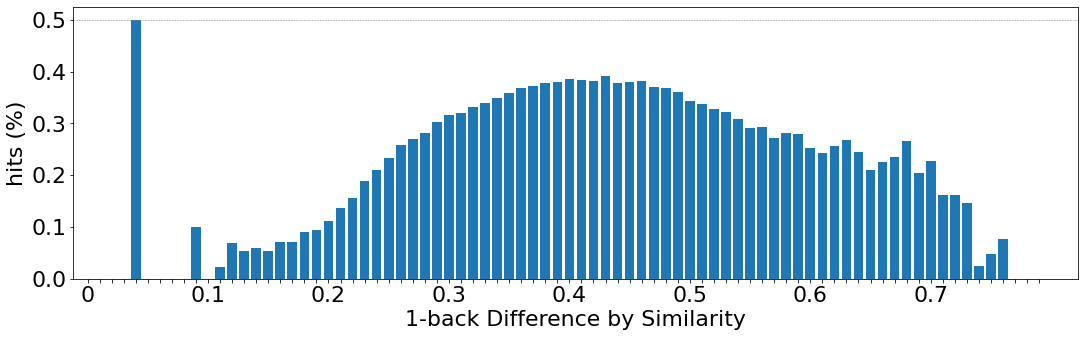

<Figure size 432x288 with 0 Axes>

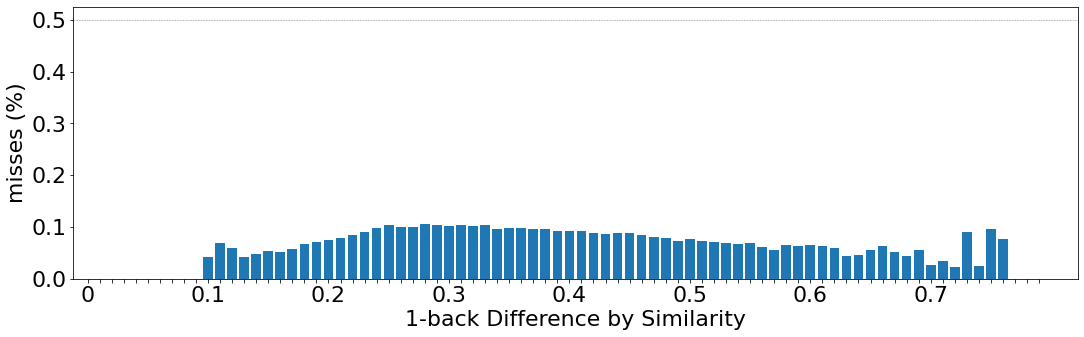

<Figure size 432x288 with 0 Axes>

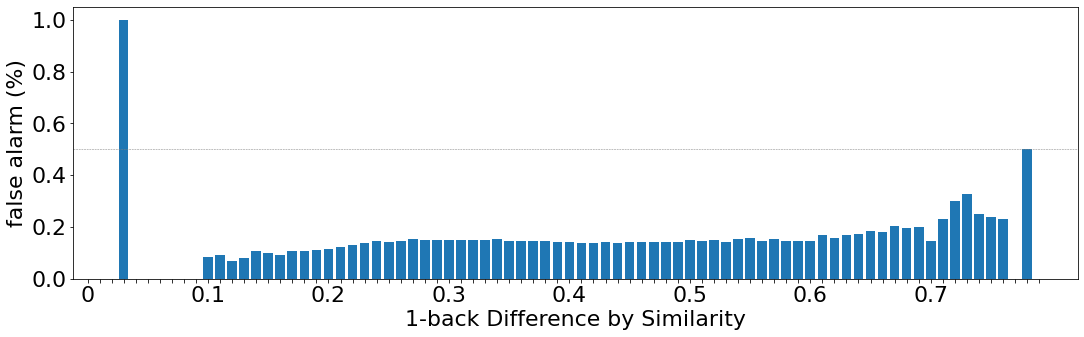

<Figure size 432x288 with 0 Axes>

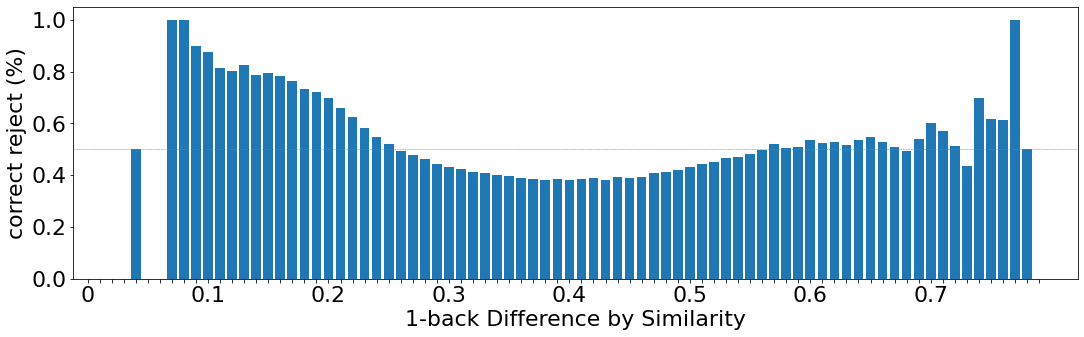

<Figure size 432x288 with 0 Axes>

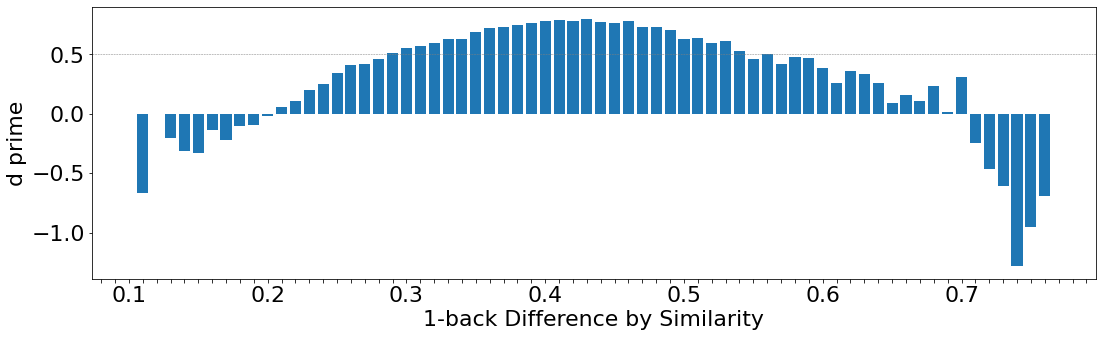

<Figure size 432x288 with 0 Axes>

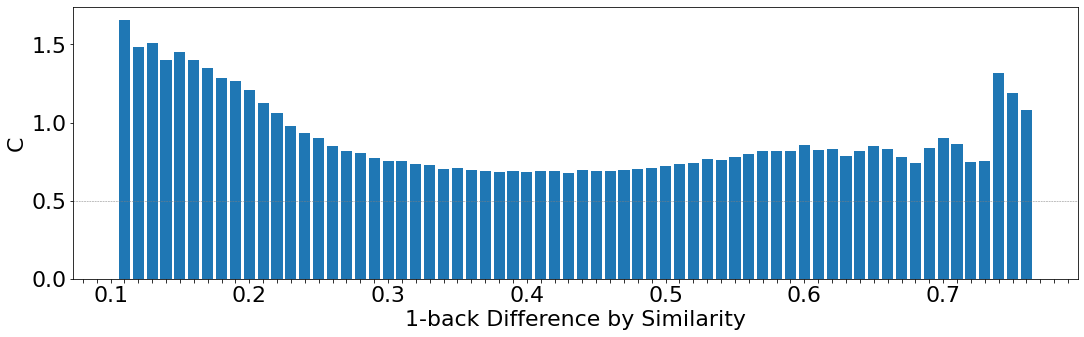

<Figure size 432x288 with 0 Axes>

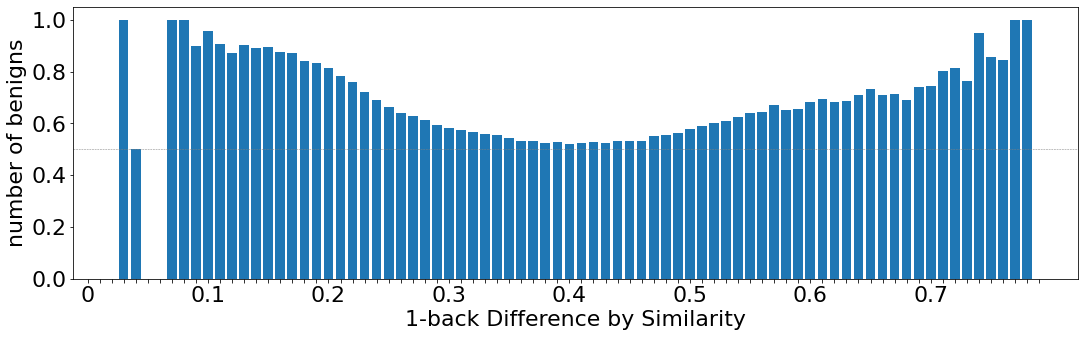

<Figure size 432x288 with 0 Axes>

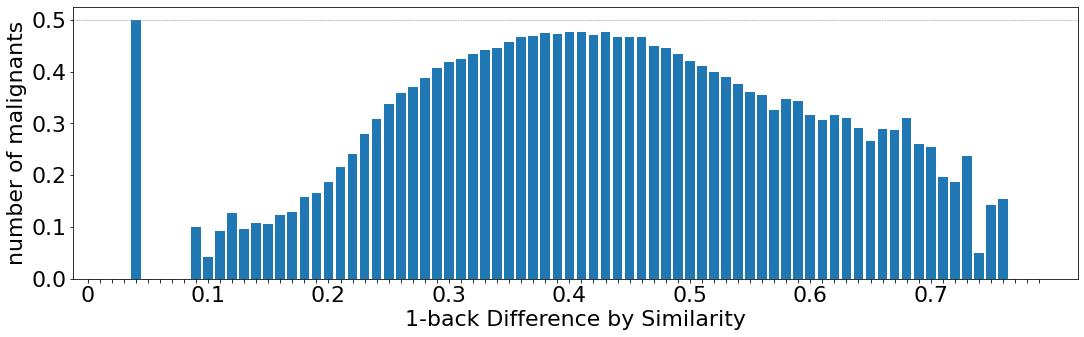

<Figure size 432x288 with 0 Axes>

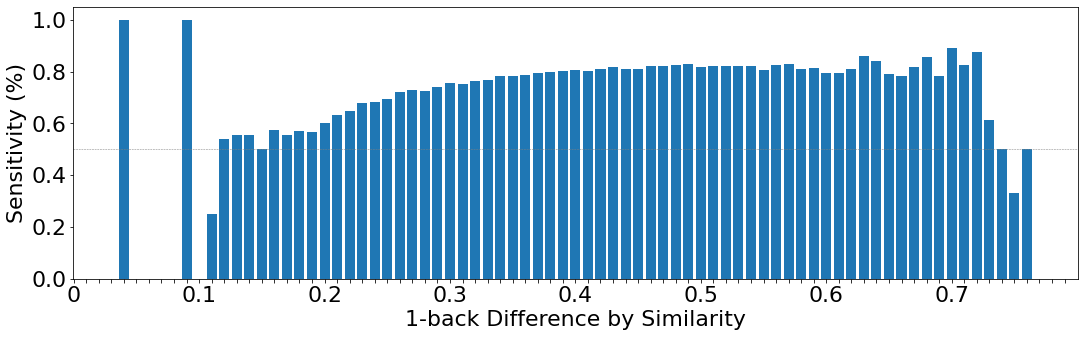

<Figure size 432x288 with 0 Axes>

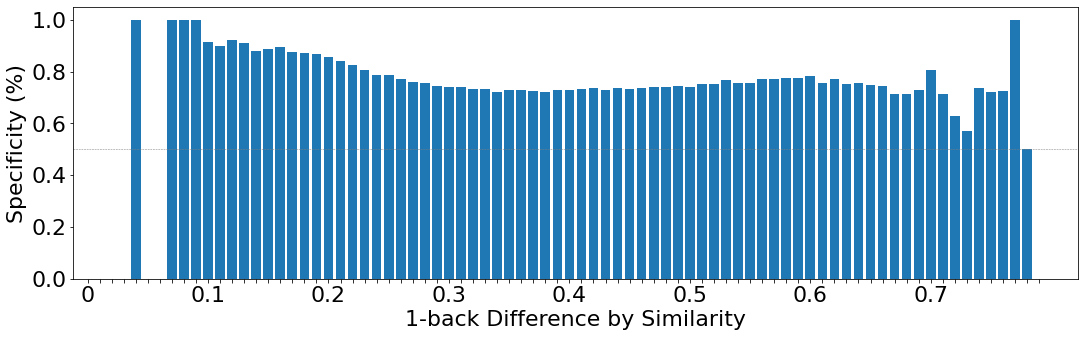

<Figure size 432x288 with 0 Axes>

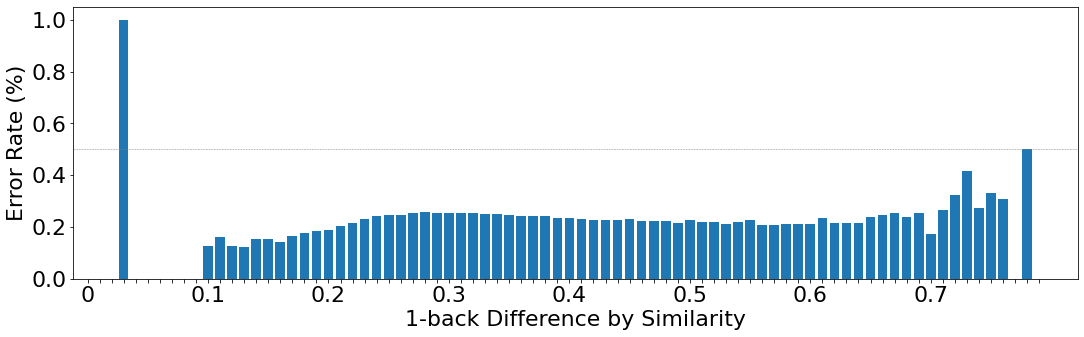

In [12]:
import scipy.stats as stats

hit_1back = []
miss_1back = []
FA_1back = []
CR_1back = []
lengths_1back = []
num_benign_1back = []
num_malignant_1back = []
sensitivity_1back = []
specificity_1back = []
error_rate_1back = []
# balance_rate = []
for start in np.arange(0, 0.79, 0.01):
    data_temp = data[data['similarity_bins_1back'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.01, decimals=2, out=None), closed='right')]
    lengths_1back.append(data_temp.shape[0])
    hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
    FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
    miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
    CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
#     hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
#     miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

    num_benign_1back.append(FA_1back[-1] + CR_1back[-1])
    num_malignant_1back.append(hit_1back[-1] + miss_1back[-1])
    sensitivity_1back.append(hit_1back[-1] / (hit_1back[-1] + miss_1back[-1]))
    specificity_1back.append(CR_1back[-1] / (CR_1back[-1] + FA_1back[-1]))
    error_rate_1back.append(1 -(hit_1back[-1] + CR_1back[-1]))
#     balance_rate.append(num_malignant[-1]/num_benign[-1])
    
# PLOT 1: hits
plt.figure()
y = hit_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1back_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_d)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1back_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: benign samples
plt.figure()
y = num_benign_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of benigns')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: malignant samples
plt.figure()
y = num_malignant_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of malignants')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: sensitivity
plt.figure()
y = sensitivity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 10: Specificity
plt.figure()
y = specificity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 11: Error Rate
plt.figure()
y = error_rate_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### 1-Forward analysis before Mergeing two sides

/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/14053679.py:15: RuntimeWarning: invalid value encountered in long_scalars
  hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/14053679.py:16: RuntimeWarning: invalid value encountered in long_scalars
  FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/14053679.py:17: RuntimeWarning: invalid value encountered in long_scalars
  miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/14053679.py:18: RuntimeWarning: invalid value e

<Figure size 432x288 with 0 Axes>

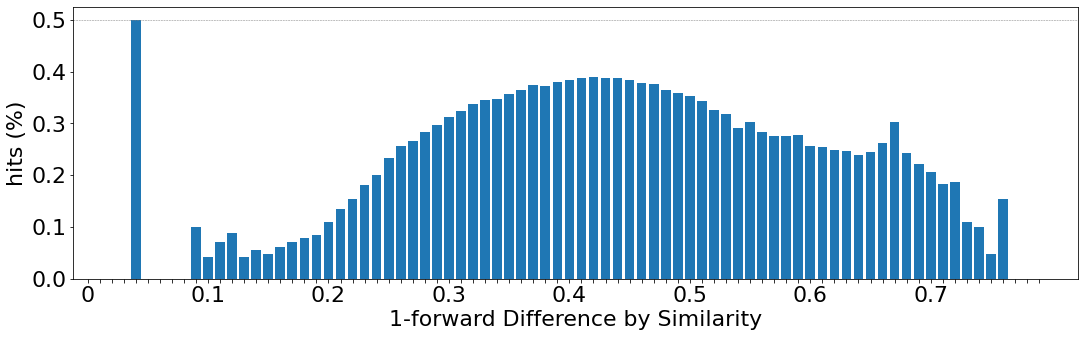

<Figure size 432x288 with 0 Axes>

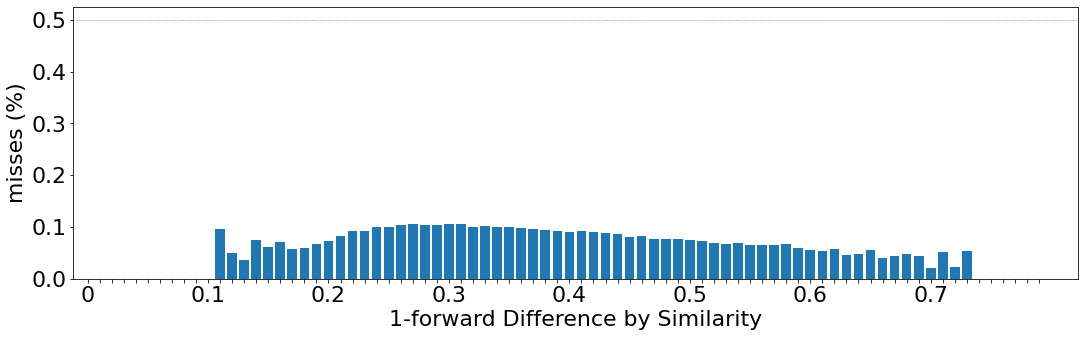

<Figure size 432x288 with 0 Axes>

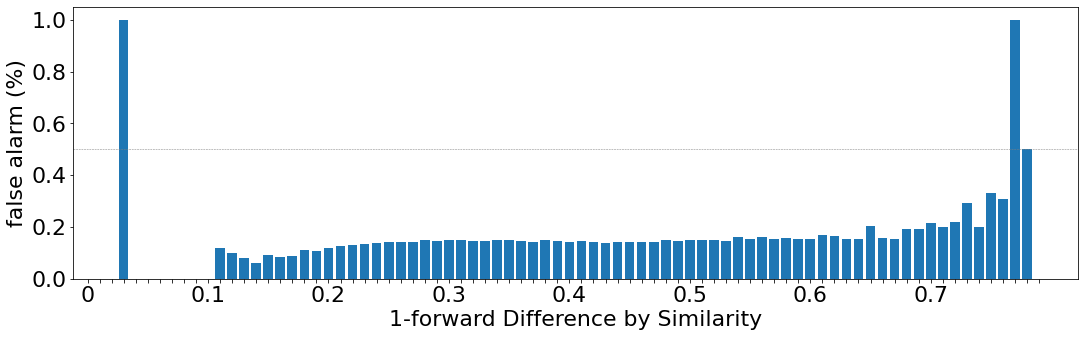

<Figure size 432x288 with 0 Axes>

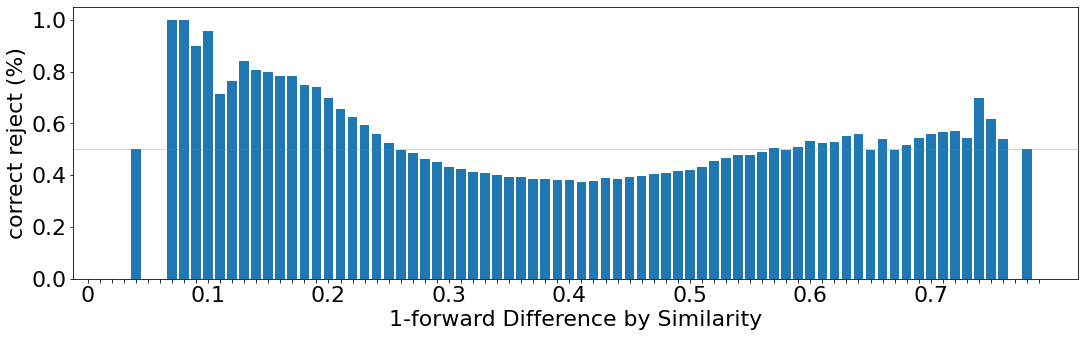

<Figure size 432x288 with 0 Axes>

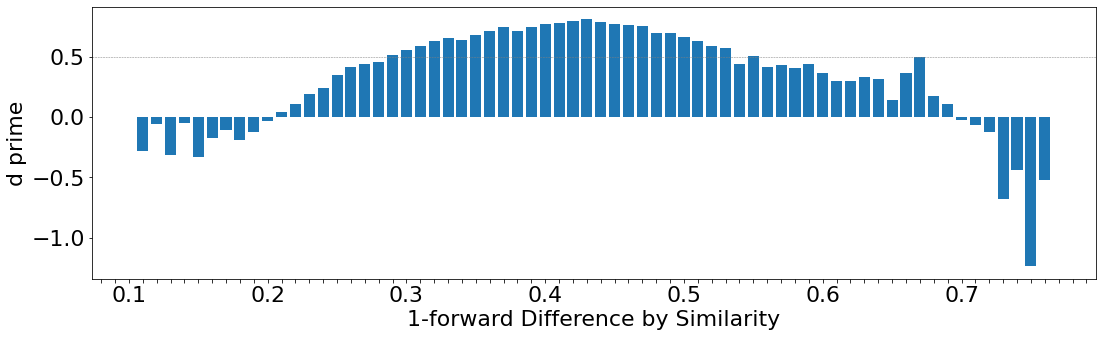

<Figure size 432x288 with 0 Axes>

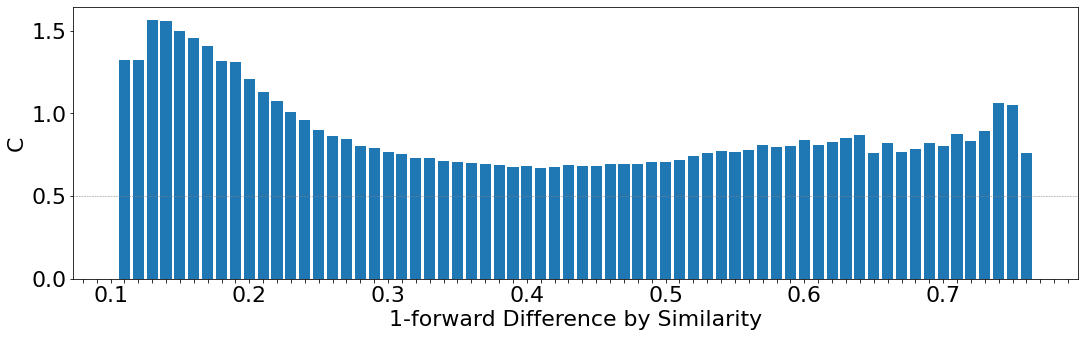

<Figure size 432x288 with 0 Axes>

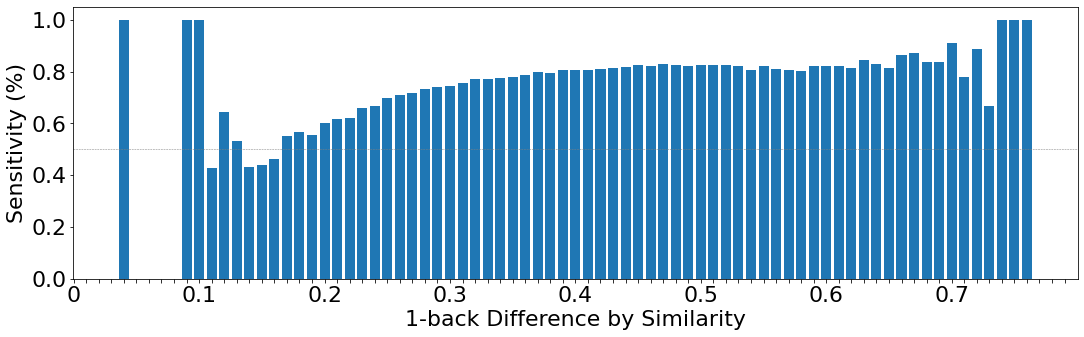

<Figure size 432x288 with 0 Axes>

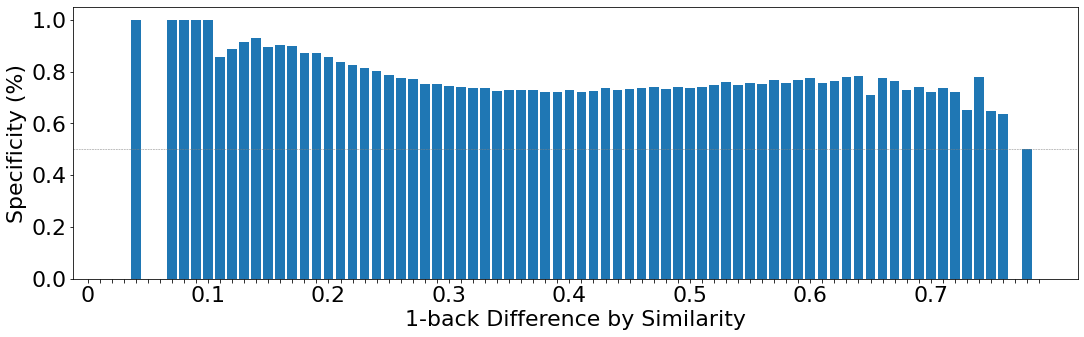

<Figure size 432x288 with 0 Axes>

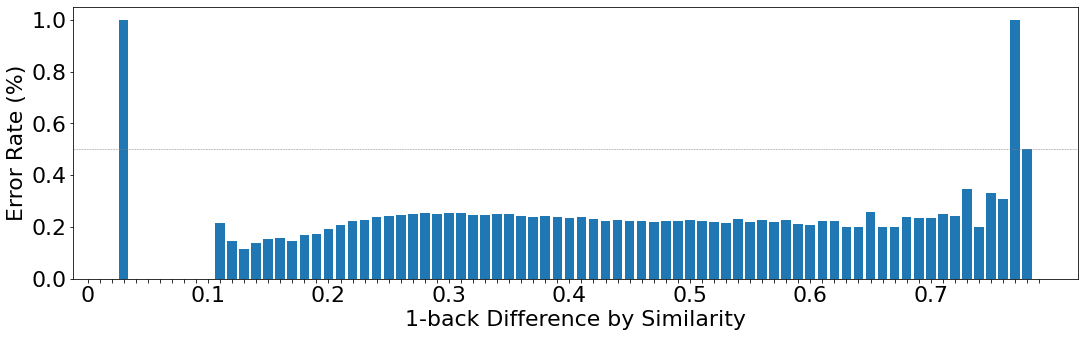

In [18]:
hit_1forward = []
miss_1forward = []
FA_1forward = []
CR_1forward = []
lengths_1forward = []
sensitivity_1forward = []
specificity_1forward = []
error_rate_1forward = []

num_benign_1forward = []
num_malignant_1forward = []
for start in np.arange(0,0.79,0.01):
    data_temp = data[data['similarity_bins_1forward'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.01, decimals=2, out=None), closed='right')]
    lengths_1forward.append(data_temp.shape[0])
    hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
    FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
    miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
    CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
#     hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
#     miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
#     CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    
    num_benign_1forward.append(FA_1forward[-1] + CR_1forward[-1])
    num_malignant_1forward.append(hit_1forward[-1] + miss_1forward[-1])
    sensitivity_1forward.append(hit_1forward[-1] / (hit_1forward[-1] + miss_1forward[-1]))
    specificity_1forward.append(CR_1forward[-1] / (CR_1forward[-1] + FA_1forward[-1]))
    error_rate_1forward.append(1 -(hit_1forward[-1] + CR_1forward[-1]))

# PLOT 1: hits
plt.figure()
y = hit_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1forward_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_d = [0 if a != a else a for a in y_1forward_d]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_d)
plt.ylabel('d prime')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1forward_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_c = [0 if a != a else a for a in y_1forward_c]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_c)
plt.ylabel('C')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = sensitivity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: Specificity
plt.figure()
y = specificity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: Error Rate
plt.figure()
y = error_rate_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### Serial Dependence on 1-back accuracy before merging

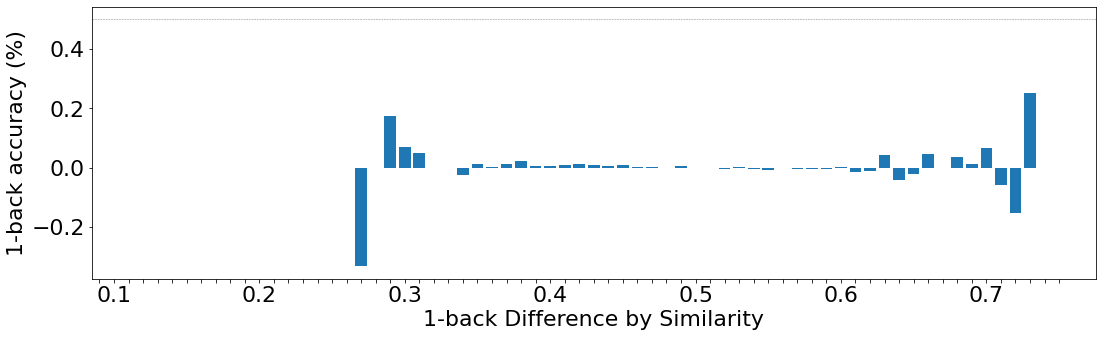

In [76]:
y = data_per_bin_b['1back_accuracy'] - data_per_bin_f['1forward_accuracy']
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

### Serial Dependence on 1-back accuracy after merging

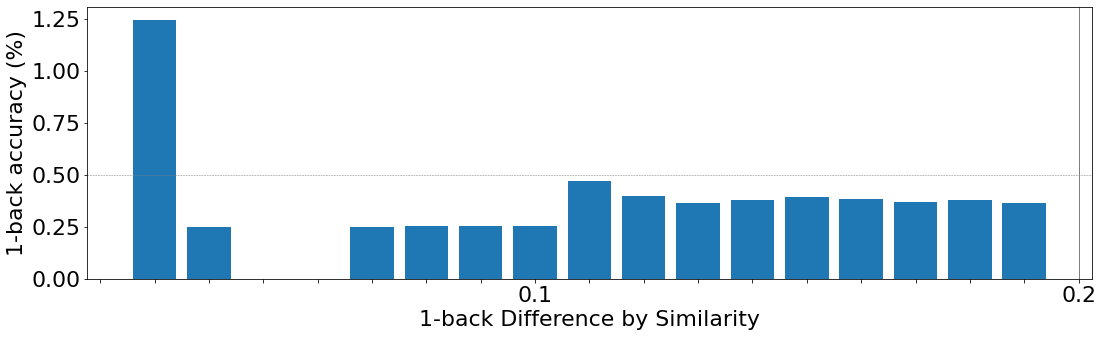

In [14]:
# y = data_per_bin['1back_accuracy'] - data_1forward_per_bin['1forward_accuracy']

y_merged = []
y = list(y)
for i in range(20):
    y_merged.append(y[i] + y[39 - i])
    
x = data_per_bin_f.index[:20]
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_merged)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

In [22]:
y = [(a - b)  for (a,b) in zip(hit_1back, hit_1forward)]
float('nan')
cleanedList = [x for x in y if x != 'nan']
cleanedList

[nan,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 -0.041666666666666664,
 -0.04817275747508305,
 -0.0196078431372549,
 0.010638297872340427,
 0.0031439875653525504,
 0.004734660033167498,
 0.009535217406887973,
 0.00010855108299701044,
 0.01193075196240935,
 0.008676276619701356,
 0.0014099491549157545,
 0.0027485344302674852,
 0.0030096828177195167,
 0.008929568575557933,
 0.009806988927417382,
 -9.176631696328208e-05,
 0.0030640586297995265,
 0.004138695294630013,
 -0.0015990595466896518,
 0.00522603792798737,
 0.004878564902830007,
 -0.004070833304851418,
 -0.006305183549040971,
 -0.0051474031781168494,
 0.001590838390537197,
 0.0016601130837793354,
 0.0031406821960490716,
 -0.001804263377987947,
 0.0069855998781541695,
 -0.00023086789319853862,
 0.002632646095175384,
 -0.004760116522243452,
 -0.009036749310436076,
 0.0033370855332832683,
 -0.00860381666938509,
 -0.0042385273573157245,
 0.004640956395754181,
 -0.005797520863390249,
 0.0031073916374855792,
 0.0023939064200

### Serial Dependence Analysis after merging

sum of hits:nan
sum of miss:nan
sum of FA:nan
sum of CR:nan


/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/1898790792.py:92: RuntimeWarning: invalid value encountered in double_scalars
  y = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_89162/1898790792.py:112: RuntimeWarning: invalid value encountered in double_scalars
  y = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]


sum of sensitivity:nan
sum of specificity:nan
sum of error rate:nan


<Figure size 432x288 with 0 Axes>

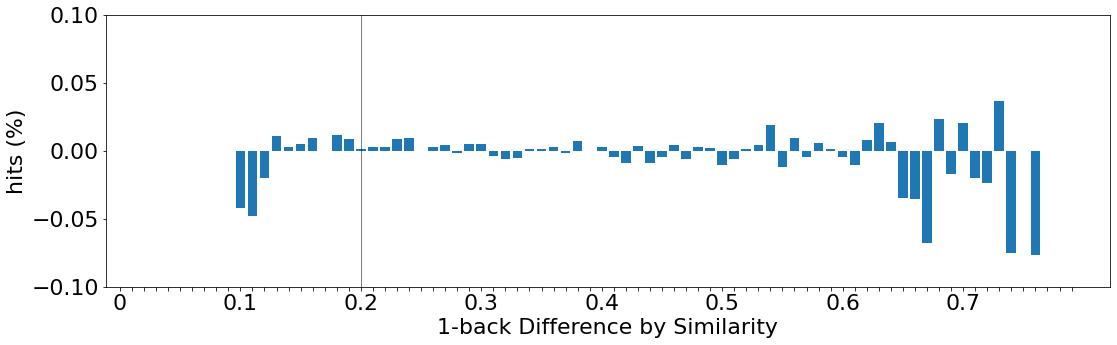

<Figure size 432x288 with 0 Axes>

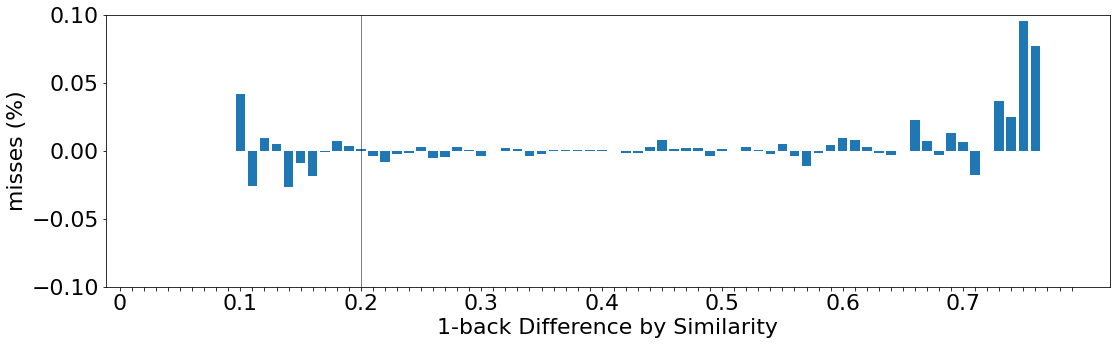

<Figure size 432x288 with 0 Axes>

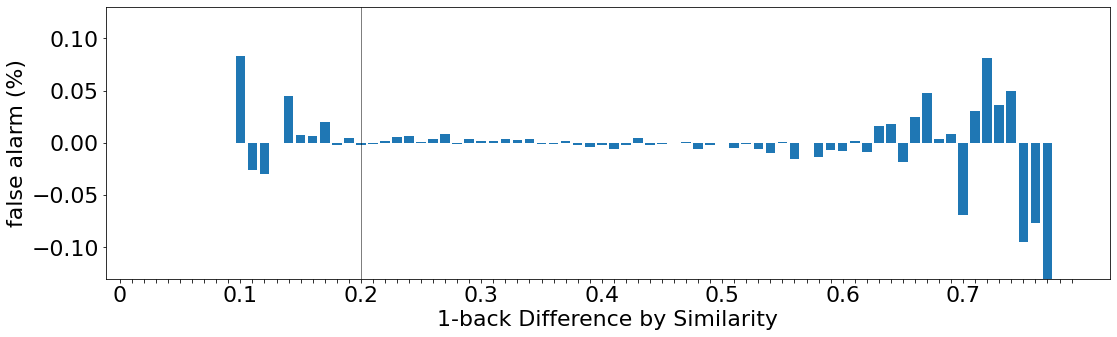

<Figure size 432x288 with 0 Axes>

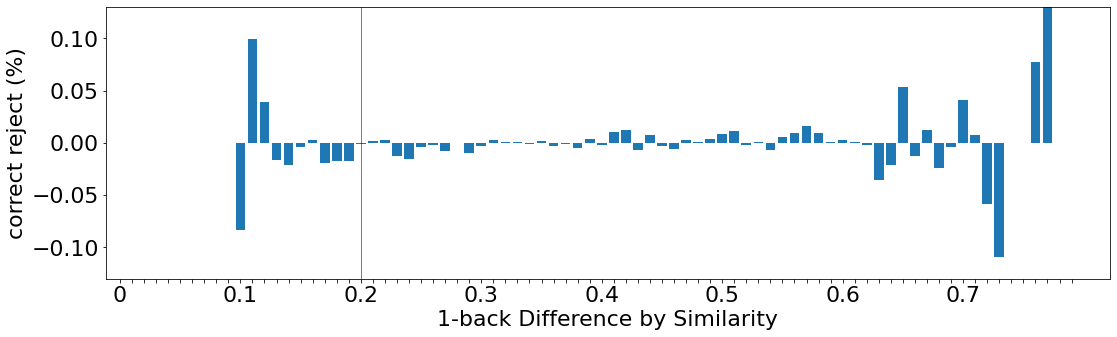

<Figure size 432x288 with 0 Axes>

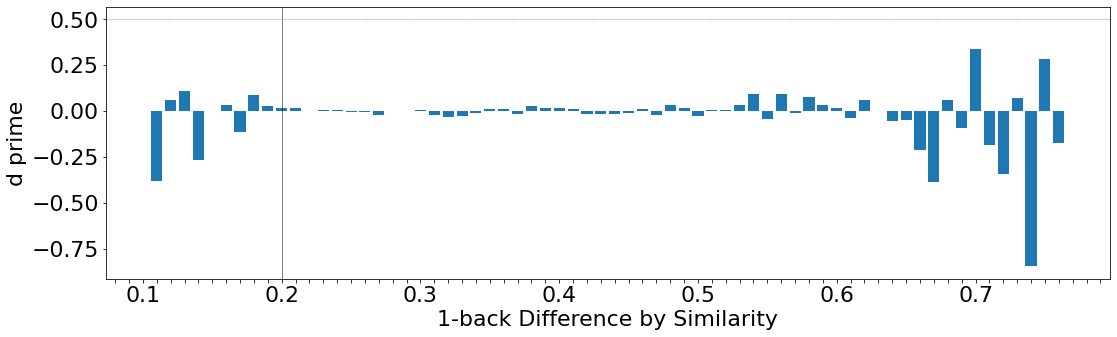

<Figure size 432x288 with 0 Axes>

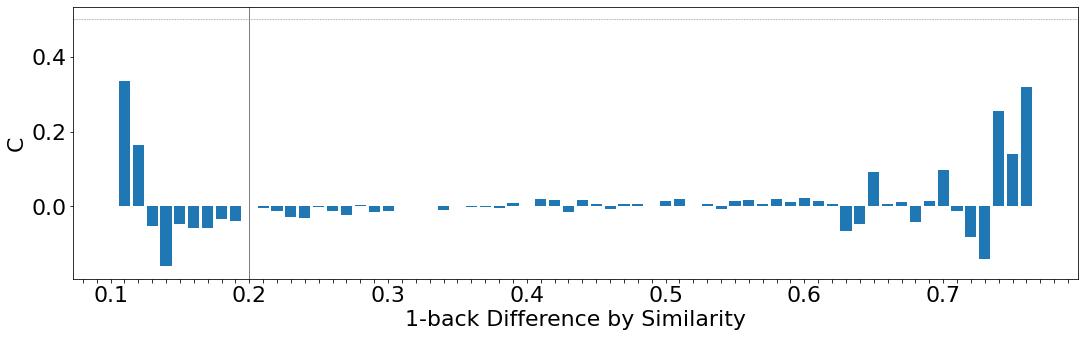

<Figure size 432x288 with 0 Axes>

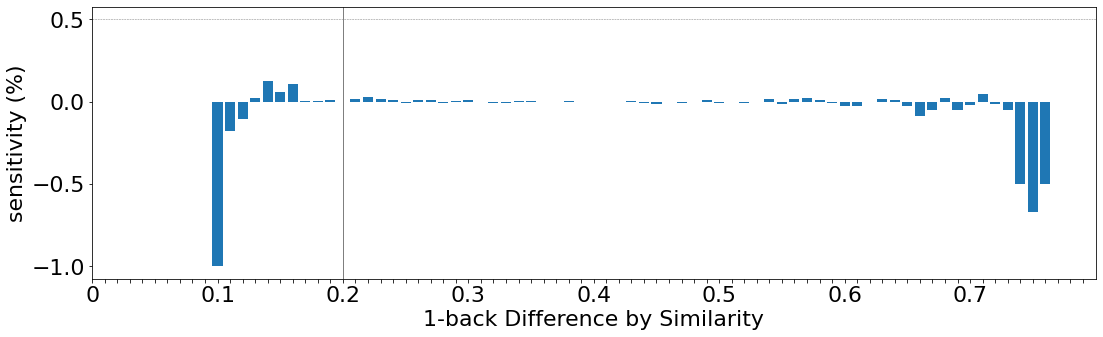

<Figure size 432x288 with 0 Axes>

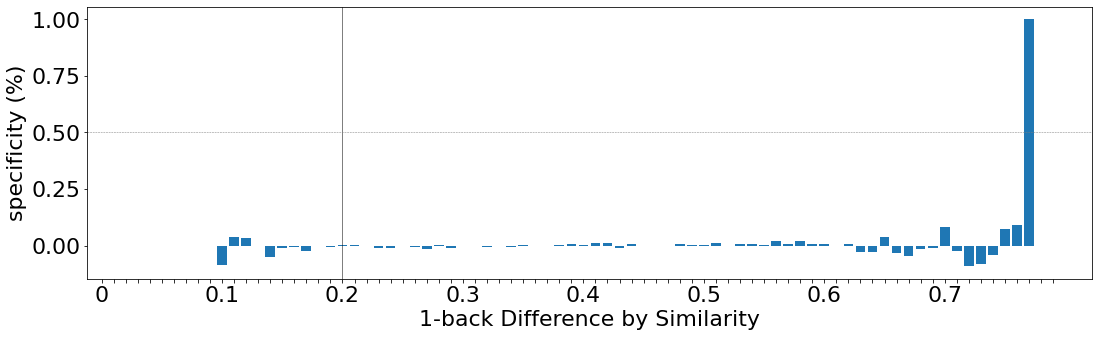

<Figure size 432x288 with 0 Axes>

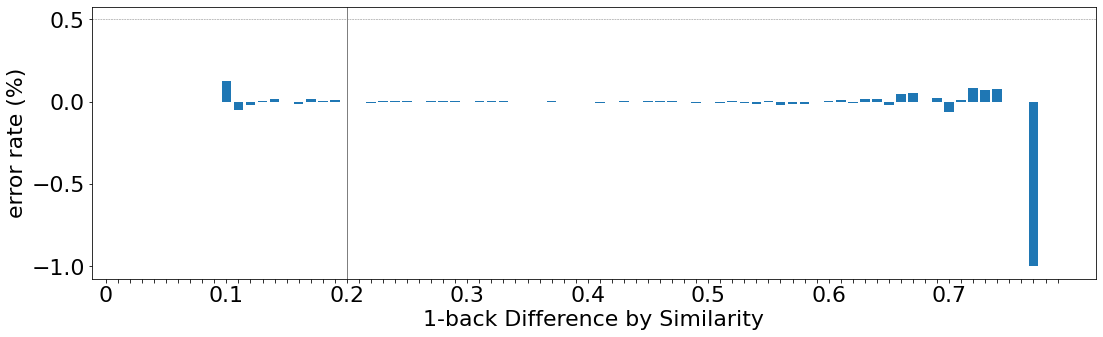

In [28]:
lenth = data.shape[0]
# PLOT 1: hits
plt.figure()
y = [(a - b) for (a,b) in zip(hit_1back, hit_1forward)]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of hits:' + str(sum(y)))

# PLOT 2: miss
plt.figure()
y = [(a - b) for (a,b) in zip(miss_1back, miss_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of miss:' + str(sum(y)))

# PLOT 3: false alarm
plt.figure()
y = [(a - b) for (a,b) in zip(FA_1back, FA_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.13, 0.13])
print('sum of FA:' + str(sum(y)))

# PLOT 4: correct reject
plt.figure()
y = [(a - b) for (a,b) in zip(CR_1back, CR_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.13, 0.13])
print('sum of CR:' + str(sum(y)))

# PLOT 5: d'
plt.figure()
y = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = [a - b for (a,b) in zip(sensitivity_1back, sensitivity_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of sensitivity:' + str(sum(y)))

# PLOT 8: specificity
plt.figure()
y = [a - b for (a,b) in zip(specificity_1back, specificity_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('specificity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of specificity:' + str(sum(y)))

# PLOT 9: error rate
plt.figure()
y = [a - b for (a,b) in zip(error_rate_1back, error_rate_1forward)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('error rate (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# plt.ylim([-0.001, 0.001])
print('sum of error rate:' + str(sum(y)))